# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

ссылка на посылку задачи A: https://contest.yandex.ru/contest/72492/run-report/129725777/

ссылка на посылку задачи B: https://contest.yandex.ru/contest/72492/run-report/129725768/

username: nsnazarov@edu.hse.ru

отправил туда hw5code с закоменченным LinearRegressionTree

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

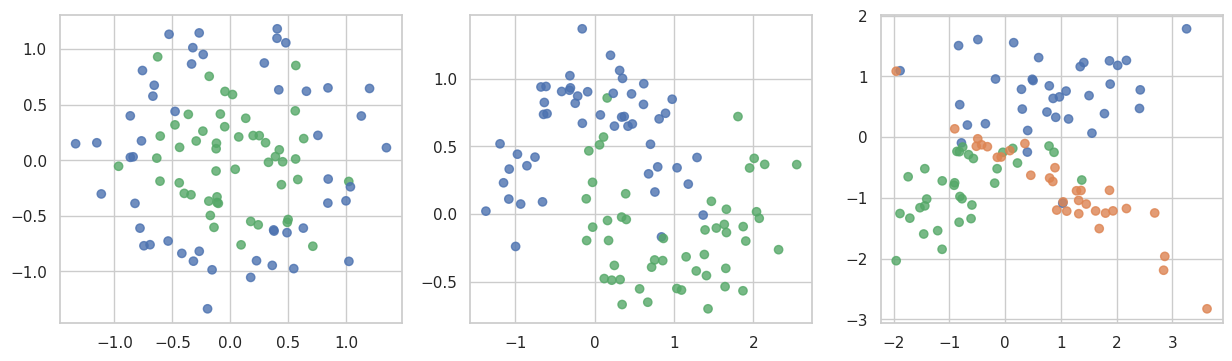

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

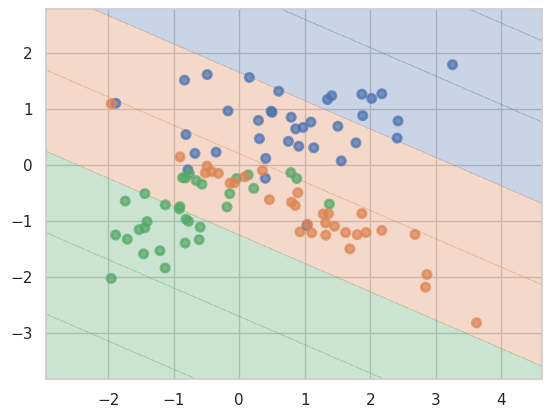

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Accuracy on train: 1.0
Accuracy on test: 0.7333333333333333


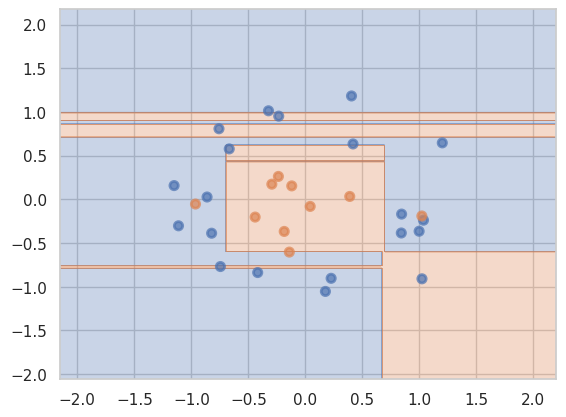

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score
X, y = datasets[0] # для make_circles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print('Accuracy on train:', accuracy_score(y_train, clf.predict(X_train)))
print('Accuracy on test:', accuracy_score(y_test, clf.predict(X_test)))
plot_surface(clf, X_test, y_test)

Accuracy on train: 1.0
Accuracy on test: 0.8666666666666667


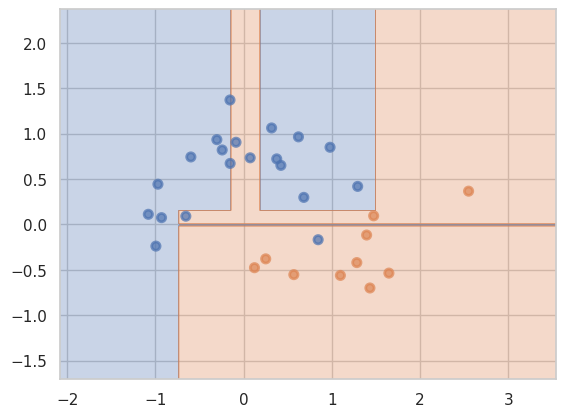

In [ ]:
X, y = datasets[1] # для make_moons
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print('Accuracy on train:', accuracy_score(y_train, clf.predict(X_train)))
print('Accuracy on test:', accuracy_score(y_test, clf.predict(X_test)))
plot_surface(clf, X_test, y_test)

Accuracy on train: 1.0
Accuracy on test: 0.8333333333333334


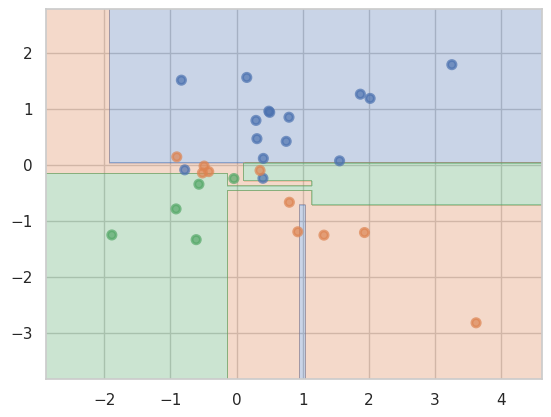

In [ ]:
X, y = datasets[2] # для make_classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print('Accuracy on train:', accuracy_score(y_train, clf.predict(X_train)))
print('Accuracy on test:', accuracy_score(y_test, clf.predict(X_test)))
plot_surface(clf, X_test, y_test)

__Ответ:__ да, деревья сильно переобучились, так как accuracy_score на треине равен 1, а на тесте значительно меньше 1 (0.73, 0.87 и 0.83), то есть на треине работают идеально, а на тесте нет.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

For max_depth=3 and min_samples_leaf=16 accuracy on train: 0.7714, accuracy on test: 0.7000
For max_depth=3 and min_samples_leaf=6 accuracy on train: 0.8429, accuracy on test: 0.8000
For max_depth=3 and min_samples_leaf=1 accuracy on train: 0.8857, accuracy on test: 0.7333
For max_depth=5 and min_samples_leaf=16 accuracy on train: 0.7714, accuracy on test: 0.7000
For max_depth=5 and min_samples_leaf=6 accuracy on train: 0.8429, accuracy on test: 0.9000
For max_depth=5 and min_samples_leaf=1 accuracy on train: 0.9714, accuracy on test: 0.7667
For max_depth=None and min_samples_leaf=16 accuracy on train: 0.7714, accuracy on test: 0.7000
For max_depth=None and min_samples_leaf=6 accuracy on train: 0.8429, accuracy on test: 0.9000
For max_depth=None and min_samples_leaf=1 accuracy on train: 1.0000, accuracy on test: 0.7333


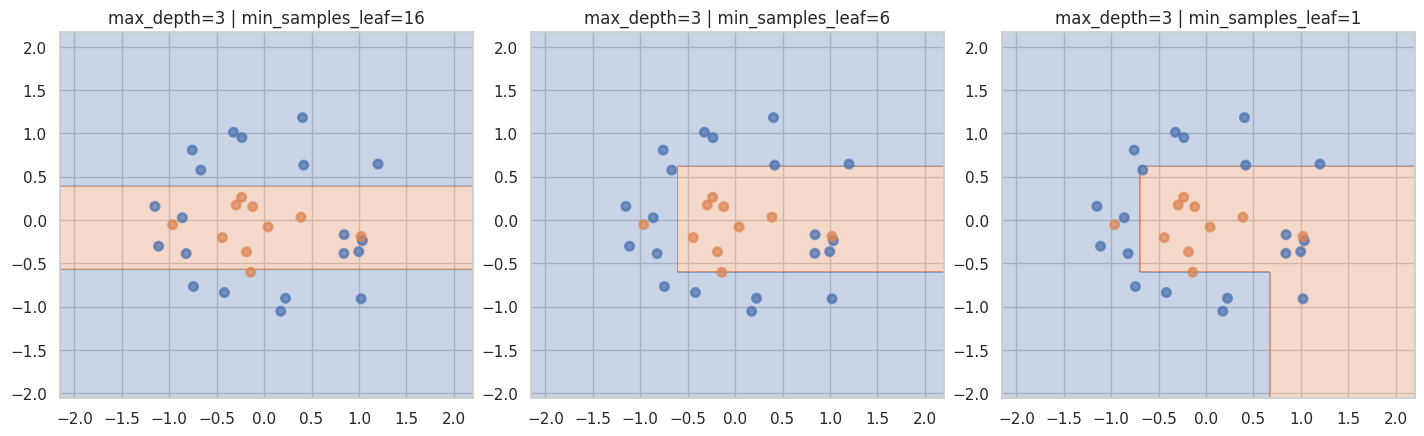

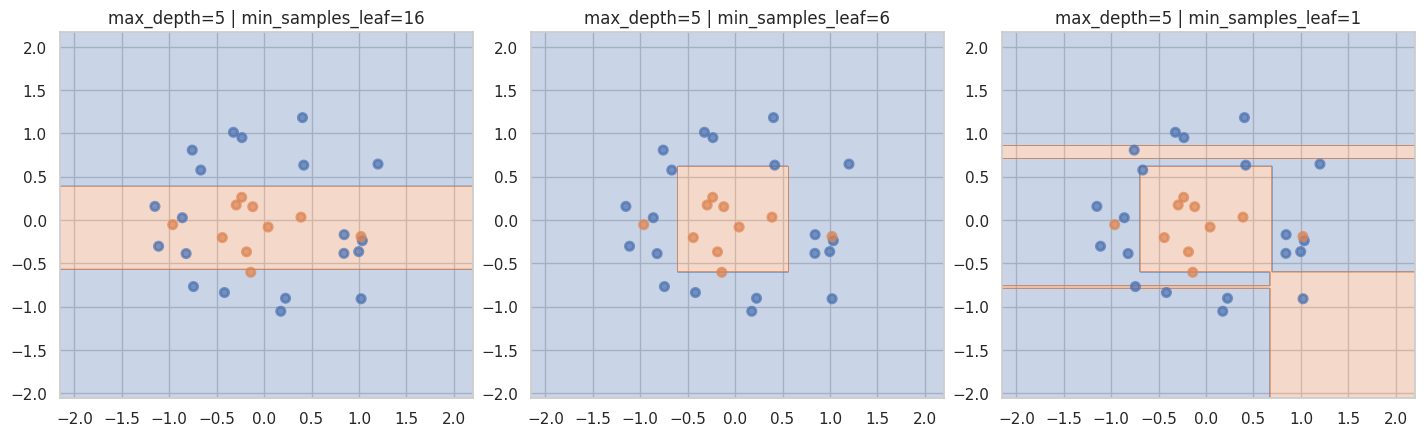

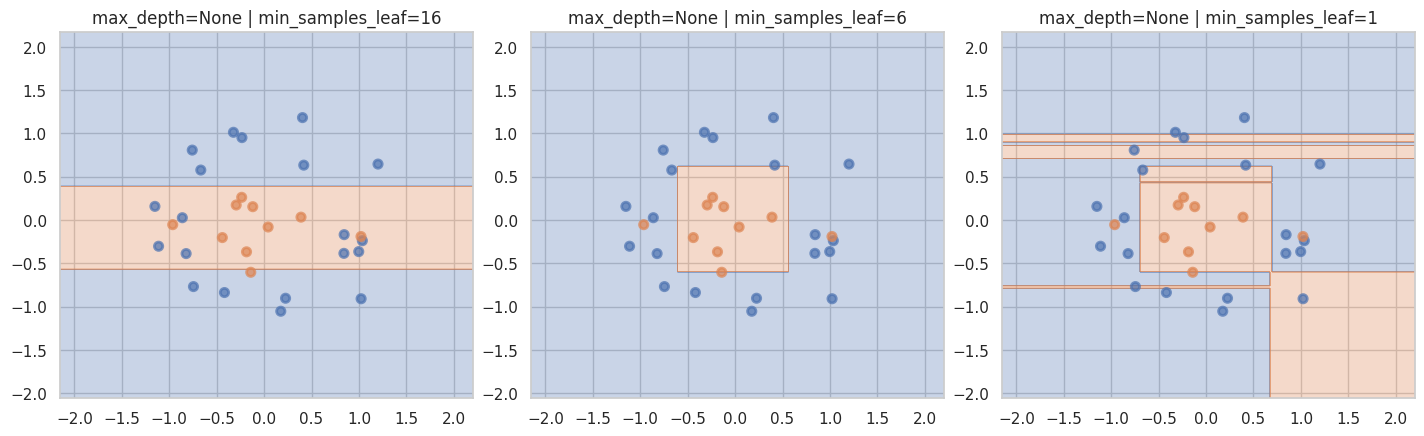

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = datasets[0] # для make_circles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = [3, 5, None]
samples_leaf = [16, 6, 1]
for i, max_depth in enumerate(depths):
  plt.figure(figsize=(15, 5))
  for j, min_samples_leaf in enumerate(samples_leaf):
    plt.subplot(1, 3, j + 1)
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    plot_surface(clf, X_test, y_test)
    plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
    print('For max_depth=' + str(max_depth) + ' and min_samples_leaf=' + str(min_samples_leaf) + ' accuracy on train: ' + "%.4f" % accuracy_score(y_train, clf.predict(X_train)) + ', accuracy on test: ' + "%.4f" % accuracy_score(y_test, clf.predict(X_test)))

У этого датасета разделяющая поверхность становится поделена на большее число зон при росте max_depth (когда None, то у дерева нет ограничения по этому параметру) и при уменьшении min_samples_leaf (когда 1, то по сути у дерева нет ограничения по этому параметру) - это логично, ведь когда у дерева нет ограничений, оно может сильно переобучаться. Что касается обобшающей способности, то вначале качество на тесте невысокое, однако при снижении ограничений для модели оно увеличивается - максимальное (0.9) при max_depth=5 and min_samples_leaf=6 и max_depth=None and min_samples_leaf=6. Дальше, когда вообще нет ограничений, качество  падает: с 0.9 до 0.7333.

For max_depth=3 and min_samples_leaf=16 accuracy on train: 0.8429, accuracy on test: 0.8000
For max_depth=3 and min_samples_leaf=6 accuracy on train: 0.8714, accuracy on test: 0.7667
For max_depth=3 and min_samples_leaf=1 accuracy on train: 0.9143, accuracy on test: 0.9333
For max_depth=5 and min_samples_leaf=16 accuracy on train: 0.8429, accuracy on test: 0.8000
For max_depth=5 and min_samples_leaf=6 accuracy on train: 0.9286, accuracy on test: 0.7000
For max_depth=5 and min_samples_leaf=1 accuracy on train: 1.0000, accuracy on test: 0.8667
For max_depth=None and min_samples_leaf=16 accuracy on train: 0.8429, accuracy on test: 0.8000
For max_depth=None and min_samples_leaf=6 accuracy on train: 0.9286, accuracy on test: 0.7000
For max_depth=None and min_samples_leaf=1 accuracy on train: 1.0000, accuracy on test: 0.8667


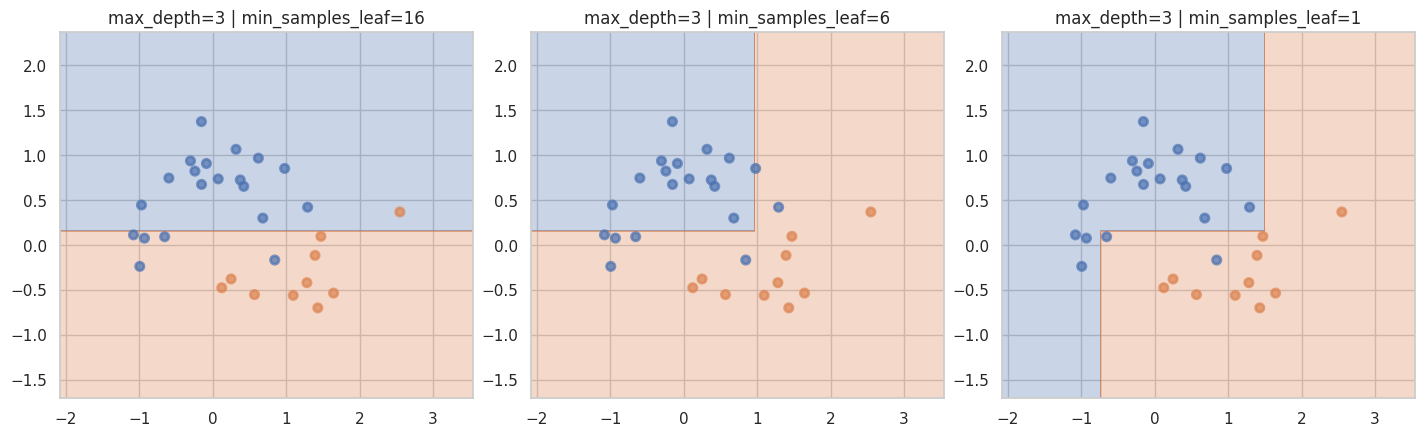

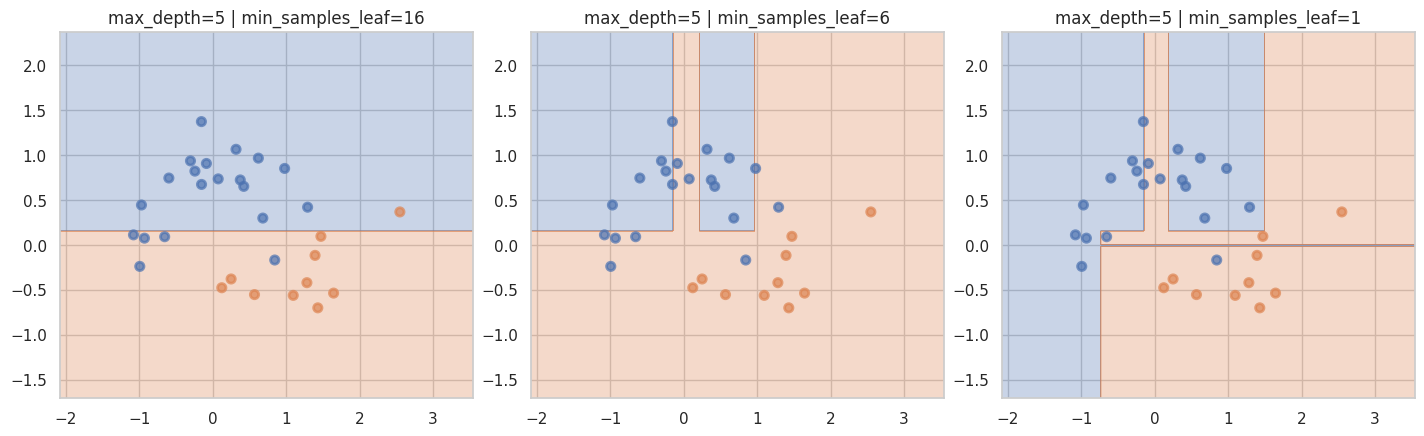

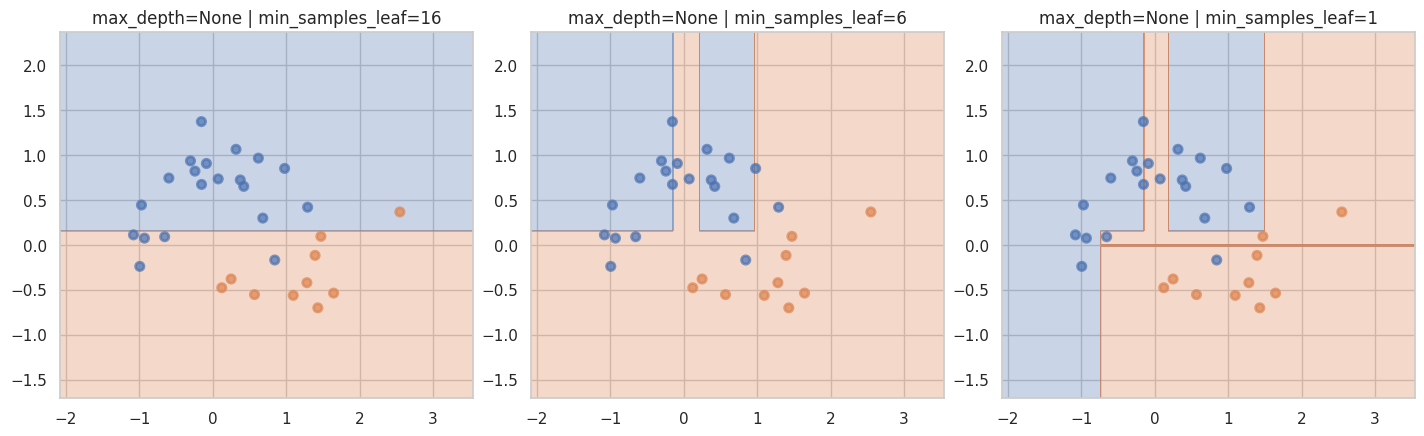

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = datasets[1] # для make_moons
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = [3, 5, None]
samples_leaf = [16, 6, 1]
for i, max_depth in enumerate(depths):
  plt.figure(figsize=(15, 5))
  for j, min_samples_leaf in enumerate(samples_leaf):
    plt.subplot(1, 3, j + 1)
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    plot_surface(clf, X_test, y_test)
    plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
    print('For max_depth=' + str(max_depth) + ' and min_samples_leaf=' + str(min_samples_leaf) + ' accuracy on train: ' + "%.4f" % accuracy_score(y_train, clf.predict(X_train)) + ', accuracy on test: ' + "%.4f" % accuracy_score(y_test, clf.predict(X_test)))

У этого датасета так же, как и у предыдущего разделяющая поверхность становится поделена на большее число зон при росте max_depth (когда None, то у дерева нет ограничения по этому параметру) и при уменьшении min_samples_leaf (когда 1, то по сути у дерева нет ограничения по этому параметру). Однако, что касается обобщающей способности, дерево начинает быстрее переобучаться при снижении "регуляризации", чем на предыдущем датасете: здесь макс кач-во на тесте (0.9333) достигается при max_depth=3 and min_samples_leaf=1 и потом при дальнейшем ослаблении регуляризации только падает.

For max_depth=3 and min_samples_leaf=16 accuracy on train: 0.8857, accuracy on test: 0.7667
For max_depth=3 and min_samples_leaf=6 accuracy on train: 0.8857, accuracy on test: 0.7667
For max_depth=3 and min_samples_leaf=1 accuracy on train: 0.9429, accuracy on test: 0.8667
For max_depth=5 and min_samples_leaf=16 accuracy on train: 0.8857, accuracy on test: 0.7667
For max_depth=5 and min_samples_leaf=6 accuracy on train: 0.8857, accuracy on test: 0.7667
For max_depth=5 and min_samples_leaf=1 accuracy on train: 0.9714, accuracy on test: 0.8000
For max_depth=None and min_samples_leaf=16 accuracy on train: 0.8857, accuracy on test: 0.7667
For max_depth=None and min_samples_leaf=6 accuracy on train: 0.8857, accuracy on test: 0.7667
For max_depth=None and min_samples_leaf=1 accuracy on train: 1.0000, accuracy on test: 0.8333


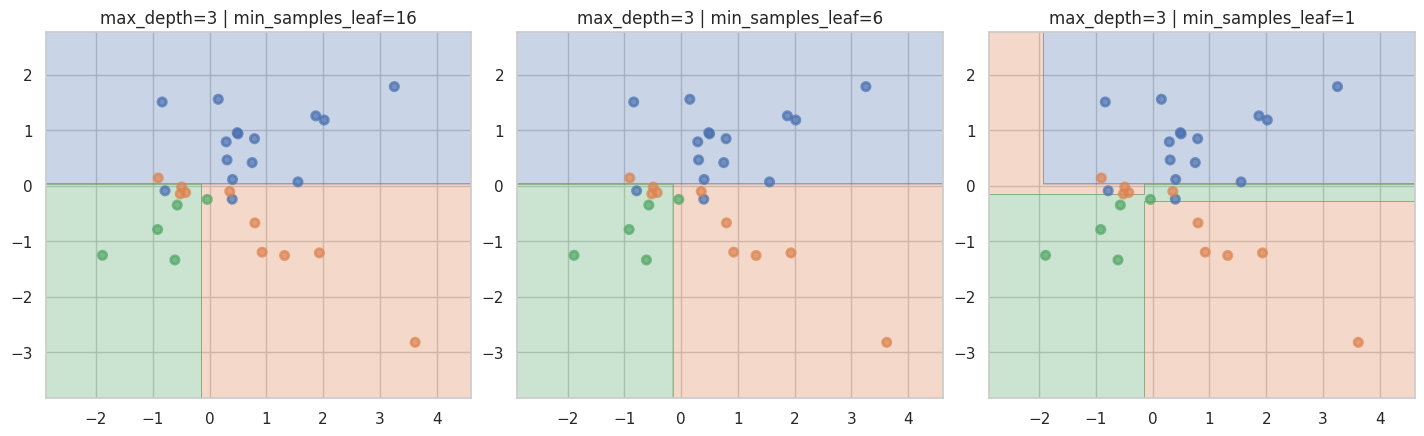

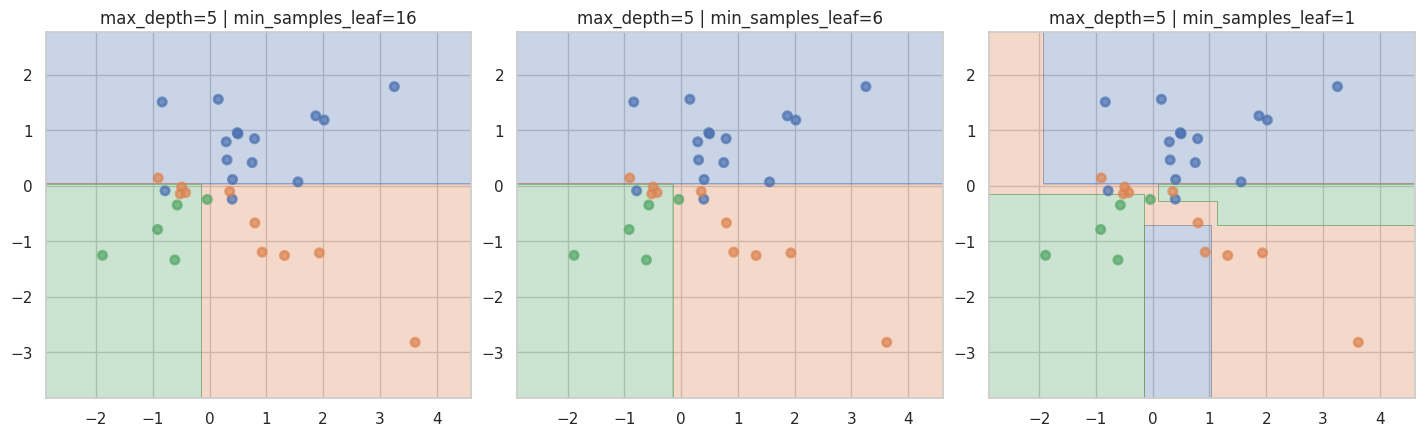

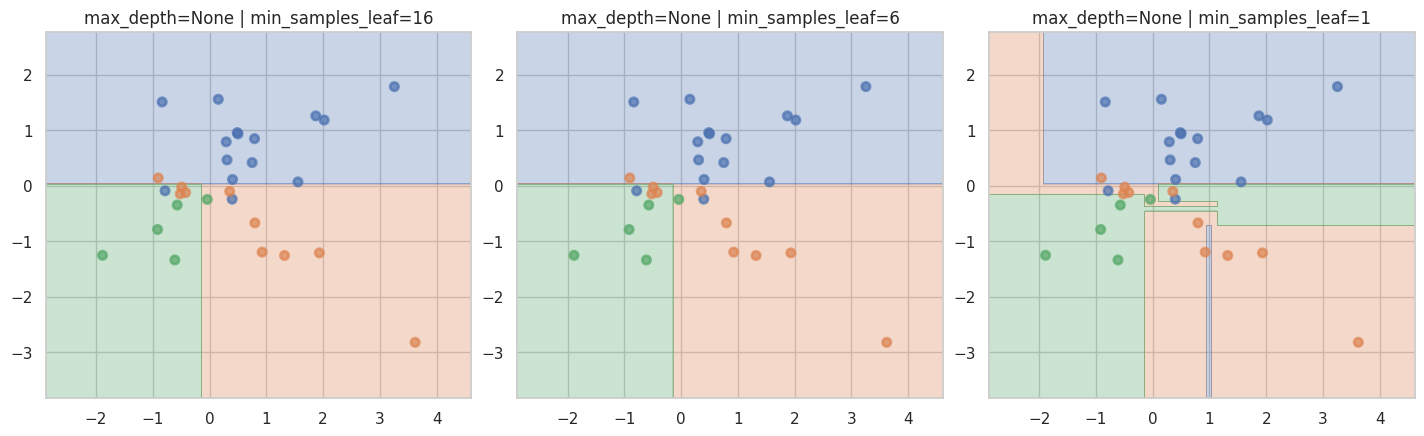

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X, y = datasets[2] # для make_classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
depths = [3, 5, None]
samples_leaf = [16, 6, 1]
for i, max_depth in enumerate(depths):
  plt.figure(figsize=(15, 5))
  for j, min_samples_leaf in enumerate(samples_leaf):
    plt.subplot(1, 3, j + 1)
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    plot_surface(clf, X_test, y_test)
    plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))
    print('For max_depth=' + str(max_depth) + ' and min_samples_leaf=' + str(min_samples_leaf) + ' accuracy on train: ' + "%.4f" % accuracy_score(y_train, clf.predict(X_train)) + ', accuracy on test: ' + "%.4f" % accuracy_score(y_test, clf.predict(X_test)))

У этого датасета так же, как и у предыдущих разделяющая поверхность становится поделена на большее число зон при росте max_depth (когда None, то у дерева нет ограничения по этому параметру) и при уменьшении min_samples_leaf (когда 1, то по сути у дерева нет ограничения по этому параметру). Что касается обобщающей способности, лучшее значение качества модели на этом датасете (accuracy_score) ниже лучших значений на остальных (возможно, это из-за того, что предсказывать принадлежность к одному из трех классов сложнее, чем к одному из двух). Что касается качества на тесте, то оно относительно предыдущих датасетов незначительно колеблется в зависимости от параметров возле 0.8 и принимает макс значение 0.8667 при max_depth=3 and min_samples_leaf=1.

__Ответ:__ см. выше.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
!wget  -O 'students.csv' -q 'https://www.dropbox.com/scl/fi/3yrdy9h4bxr2n8bll0g7j/students.csv?rlkey=dfxw3so3w8nhhomsorb61vcy6&st=0brdrpl3&dl=0'
data = pd.read_csv('students.csv')

In [ ]:
!wget  -O 'hw5code.py' -q 'https://www.dropbox.com/scl/fi/gn1hje8pxsi6vm6nafleg/hw5code.py?rlkey=3qx0bu54uyln9s5dkt53ssgl9&st=fo7hjoob&dl=0'
from hw5code import find_best_split

In [ ]:
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


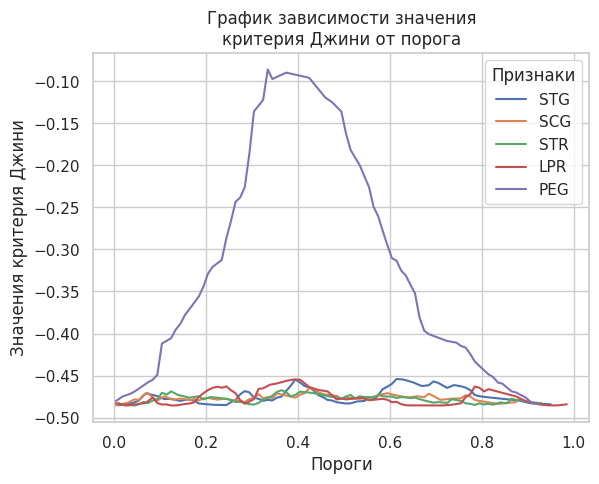

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
target = data.iloc[:, 5]
columns = data.columns.tolist()
for i in range(5):
  feature = data.iloc[:, i]
  thresholds, ginis, threshold_best, gini_best = find_best_split(feature, target)
  x = thresholds
  y = ginis
  plt.plot(x, y, label=columns[i])
plt.xlabel('Пороги')
plt.ylabel('Значения критерия Джини')
plt.title('График зависимости значения\nкритерия Джини от порога')
plt.legend(title='Признаки', loc='upper right')
plt.show()

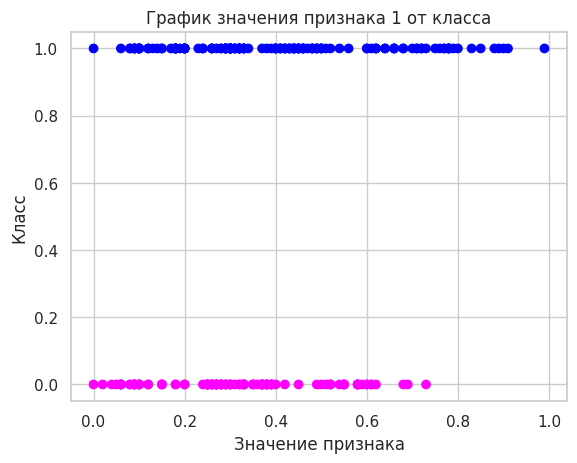

In [ ]:
x = data.iloc[:, 0]
y = data.iloc[:, 5]
color = y.map({0: 'magenta', 1: 'blue'})
plt.scatter(x, y, c = color)
plt.xlabel('Значение признака')
plt.ylabel('Класс')
plt.title('График значения признака 1 от класса')
plt.show()

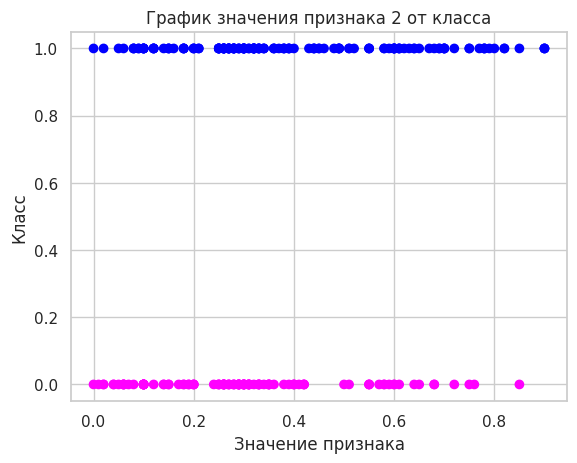

In [ ]:
x = data.iloc[:, 1]
y = data.iloc[:, 5]
color = y.map({0: 'magenta', 1: 'blue'})
plt.scatter(x, y, c = color)
plt.xlabel('Значение признака')
plt.ylabel('Класс')
plt.title('График значения признака 2 от класса')
plt.show()

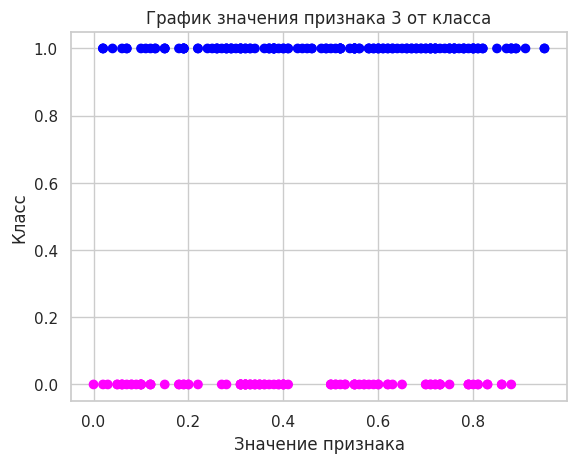

In [ ]:
x = data.iloc[:, 2]
y = data.iloc[:, 5]
color = y.map({0: 'magenta', 1: 'blue'})
plt.scatter(x, y, c = color)
plt.xlabel('Значение признака')
plt.ylabel('Класс')
plt.title('График значения признака 3 от класса')
plt.show()

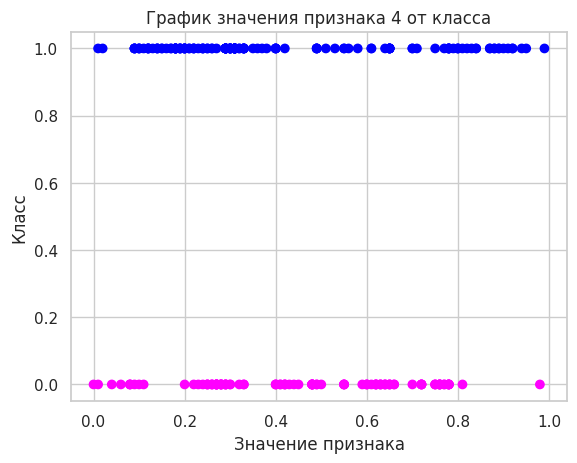

In [ ]:
x = data.iloc[:, 3]
y = data.iloc[:, 5]
color = y.map({0: 'magenta', 1: 'blue'})
plt.scatter(x, y, c = color)
plt.xlabel('Значение признака')
plt.ylabel('Класс')
plt.title('График значения признака 4 от класса')
plt.show()

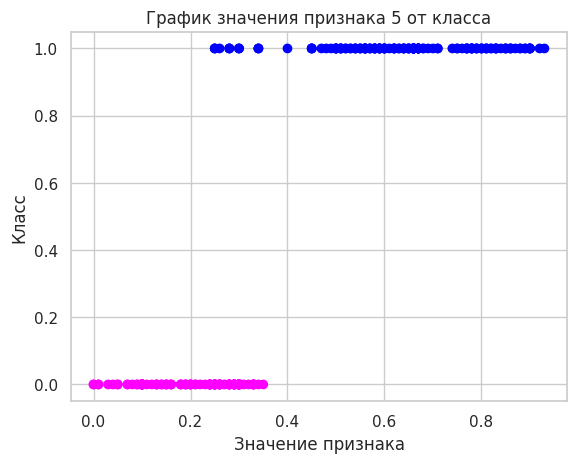

In [ ]:
x = data.iloc[:, 4]
y = data.iloc[:, 5]
color = y.map({0: 'magenta', 1: 'blue'})
plt.scatter(x, y, c = color)
plt.xlabel('Значение признака')
plt.ylabel('Класс')
plt.title('График значения признака 5 от класса')
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** исходя из кривых значений критерия Джини, производить деление подвыборки на два поддерева стоит по последнему 5 признаку (PEG), так как для него есть значение порога, при котором критерий Джини значительно больше, чем у всех остальных признаках при каких бы то ни было порогах. Следовательно, при разбиении по этому признаку по порогу, при котором критерий Джини максимален, получим наилучшее разбиаение.

Да, этот результат согласуется с визуальной оценкой scatter-графиков, поскольку только объекты 5 признака могут явно разделены каким-то порогом-значением признака, чтобы слева от него были объекты одного класса, а справа - другого класса.

У кривой для "хороших" признаков, по которым выборка делится почти идеально, должна быть большая амплитуда значений и должен быть явно различим порог, при котором достигается максимальное значение критерия Джини.

Кривые для признаков, по которым деление практически невозможно, наоборот, не обладают большой амплитудой значений, поэтому там сложно выделить явный "порог-победитель", у которого значение критерия Джини намного больше, чем у остальных порогов.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
!wget  -O 'agaricus-lepiota.data' -q 'https://www.dropbox.com/scl/fi/sz5o2hj46n4rdwasi265y/agaricus-lepiota.data?rlkey=1ojqre5g0jm5ed77lrl84swta&st=122fh9am&dl=0'
df = pd.read_csv('agaricus-lepiota.data', sep=',', header=None)

Вставил код класса, потому что при загрузке файла hw5code.py и from hw5code import DecisionTree появляется ошибка, что у класса DecisionTree нет метода find_depth, хотя он прописан.

In [141]:
import numpy as np
from sklearn.linear_model import LinearRegression
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    feat_targ_arr = np.column_stack((feature_vector, target_vector))
    sort_feat_targ_arr = feat_targ_arr[np.argsort(feat_targ_arr[:, 0])]
    sort_feat_arr = sort_feat_targ_arr[:, 0]

    thresholds = (sort_feat_arr[:-1] + sort_feat_arr[1:]) / 2 # находим средние значения всех соседних элементов массива с отсортированными признаками
    thresholds = thresholds[sort_feat_arr[:-1] != sort_feat_arr[1:]] # оставляем только те средние значения, которые являются порогами (то есть только средние значения между отличающимися признаками)

    sort_targ_arr = sort_feat_targ_arr[:, 1]
    sums = np.cumsum(sort_targ_arr) # находим накопленные суммы для каждого разделения (то есть первым элементом массива является сумма, состоящая из 1ого элемента,
    # вторым элементом - сумма из 1ого и 2ого элемента и т.д.,  то есть последним элементом будет являться сумма всех элементов)
    left_sum = sums[:-1][sort_feat_arr[:-1] != sort_feat_arr[1:]] # все, кроме последнего элемента массива sums являются потенциальными суммами объектов, которые пойдут в H_l,
    # но отбираем только те, которые реально будут такими, с помощью [sort_feat_arr[:-1] != sort_feat_arr[1:]] - это позволяет нам получить только суммы, которые получаются в результате разделения по порогам из thresholds
    right_sum = sums[-1] - left_sum # из общей суммы всех элементов (последнего элемента sums) вычитаем левые суммы и получаем массив правых сумм

    left_quant = np.arange(1, len(sort_targ_arr))[sort_feat_arr[:-1] != sort_feat_arr[1:]] # в левой вершине потенциально могут быть от 1 до (общее количество объектов - 1),
    # например, за общее кол-во объектов возьмем длину массива таргетов, и отберем только те, которые реально могут быть количествами объектов в H_l с помощью [sort_feat_arr[:-1] != sort_feat_arr[1:]]
    right_quant = len(sort_targ_arr) - left_quant # из общего количества объектов вычитаем левые кол-ва и получаем массив правых количеств

    p_1_left = left_sum / left_quant
    p_0_left = 1 - p_1_left
    p_1_right = right_sum / right_quant
    p_0_right = 1 - p_1_right

    impurity_left = 1 - p_1_left ** 2 - p_0_left ** 2
    impurity_right = 1 - p_1_right ** 2 - p_0_right ** 2
    ginis = - (left_quant / len(sort_targ_arr)) * impurity_left - (right_quant / len(sort_targ_arr)) * impurity_right # массив критериев Джини, посчитанных для каждого порога

    max_ind = np.argmax(ginis)
    gini_best = ginis[max_ind] # возвращает индекс первого вхождения максимального значения критерия Джини в массив,
    # а значит и индекс минимального порога в массиве thresholds среди всех порогов, дающих такое значение критерия Джини
    threshold_best = thresholds[max_ind]

    return thresholds, ginis, threshold_best, gini_best


class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, cur_depth=0):

        if self._max_depth is not None:
          if cur_depth >= self._max_depth:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if self._min_samples_split is not None:
          if len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            #if len(feature_vector) < 3: # делаем на это проверку в самом первом if (и вообще надо, проверять < 2, чтобы не пытаться сплитить 1 объект)
                #continue

            if np.all(feature_vector == feature_vector[0]): # проверка на то, чтобы признаки на всех объектах не были равны
              continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            # проверяем, что при подобранном пороге у нас не окажется так, что в левой или правой вершине объектов будет меньше, чем min_samples_leaf (если так случается, то не рассматриваем этот признак)
            if self._min_samples_leaf is not None:
              left_mask = feature_vector < threshold
              right_mask = ~left_mask
              if np.sum(left_mask) < self._min_samples_leaf or np.sum(right_mask) < self._min_samples_leaf:
                continue

            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], cur_depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], cur_depth + 1)

    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node["type"] == "terminal":
          return node["class"]

        else:
          if self._feature_types[node["feature_split"]] == "real":
            if x[node["feature_split"]] < node["threshold"]:
              return self._predict_node(x, node["left_child"])
            else:
              return self._predict_node(x, node["right_child"])

          elif self._feature_types[node["feature_split"]] == "categorical":
            if x[node["feature_split"]] in node["categories_split"]:
              return self._predict_node(x, node["left_child"])
            else:
              return self._predict_node(x, node["right_child"])

          else:
            raise ValueError

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def find_depth(self, node):
      if len(node) == 0:
        return 0
      elif node["type"] == "terminal":
        return 0
      else:
        return 1 + max(self.find_depth(node["left_child"]), self.find_depth(node["right_child"]))

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

def find_best_split_for_linreg(feature_vector, target_vector):
    feat_targ_arr = np.column_stack((feature_vector, target_vector))
    sort_feat_targ_arr = feat_targ_arr[np.argsort(feat_targ_arr[:, 0])]
    sort_feat_arr = sort_feat_targ_arr[:, 0]

    thresholds = (sort_feat_arr[:-1] + sort_feat_arr[1:]) / 2
    thresholds = thresholds[sort_feat_arr[:-1] != sort_feat_arr[1:]]

    sort_targ_arr = sort_feat_targ_arr[:, 1]

    # в качестве критерия разбиения будем считать среднее квадратное отклонение

    sums = np.cumsum(sort_targ_arr)
    square_sums = np.cumsum(sort_targ_arr ** 2)

    left_sum = sums[:-1][sort_feat_arr[:-1] != sort_feat_arr[1:]]
    square_left_sum = square_sums[:-1][sort_feat_arr[:-1] != sort_feat_arr[1:]]

    right_sum = sums[-1] - left_sum
    square_right_sum = square_sums[-1] - square_left_sum

    left_quant = np.arange(1, len(sort_targ_arr))[sort_feat_arr[:-1] != sort_feat_arr[1:]]

    right_quant = len(sort_targ_arr) - left_quant

    left_mean_sq_dev = (square_left_sum / left_quant) - (left_sum / left_quant) ** 2
    right_mean_sq_dev = (square_right_sum / right_quant) - (right_sum / right_quant) ** 2

    mean_sq_devs = (left_quant / len(sort_targ_arr)) * left_mean_sq_dev + (right_quant / len(sort_targ_arr)) * right_mean_sq_dev

    min_ind = np.argmin(mean_sq_devs)
    mean_sq_dev_best = mean_sq_devs[min_ind]
    threshold_best = thresholds[min_ind]

    return thresholds, mean_sq_devs, threshold_best, mean_sq_dev_best


class LinearRegressionTree():
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self._model = LinearRegression()

    def _fit_node(self, sub_X, sub_y, node, cur_depth=0):

        if self._max_depth is not None:
          if cur_depth >= self._max_depth:
            node["type"] = "terminal"
            self._model.fit(sub_X, sub_y)
            node["model"] = self._model
            return

        if self._min_samples_split is not None:
          if len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            self._model.fit(sub_X, sub_y)
            node["model"] = self._model
            return

        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["value"] = sub_y[0]
            return

        feature_best, threshold_best, mean_sq_dev_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical": # скорее всего, такие признаки надо обработать их по-другому, но не успеваю это сделать (наверно, надо применить ohe)
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError

            if np.all(feature_vector == feature_vector[0]):
              continue

            _, _, threshold, mean_sq_dev = find_best_split_for_linreg(feature_vector, sub_y)

            if self._min_samples_leaf is not None:
              left_mask = feature_vector < threshold
              right_mask = ~left_mask
              if np.sum(left_mask) < self._min_samples_leaf or np.sum(right_mask) < self._min_samples_leaf:
                continue

            if mean_sq_dev_best is None or mean_sq_dev < mean_sq_dev_best:
                feature_best = feature
                mean_sq_dev_best = mean_sq_dev
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["value"] = np.mean(sub_y)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], cur_depth + 1)
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], cur_depth + 1)


    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node["type"] == "terminal":
          if "model" in node:
            return node["model"].predict(x.reshape(1, -1))[0]
          else:
            return node["value"]

        else:
          if self._feature_types[node["feature_split"]] == "real":
            if x[node["feature_split"]] < node["threshold"]:
              return self._predict_node(x, node["left_child"])
            else:
              return self._predict_node(x, node["right_child"])

          elif self._feature_types[node["feature_split"]] == "categorical":
            if x[node["feature_split"]] in node["categories_split"]:
              return self._predict_node(x, node["left_child"])
            else:
              return self._predict_node(x, node["right_child"])

          else:
            raise ValueError

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def find_depth(self, node):
      if len(node) == 0:
        return 0
      elif node["type"] == "terminal":
        return 0
      else:
        return 1 + max(self.find_depth(node["left_child"]), self.find_depth(node["right_child"]))

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

encod = LabelEncoder()
for col in df.columns:
    df[col] = encod.fit_transform(df[col])
X = df.drop(df.columns[0], axis=1)
y = df.iloc[:, 0]
feature_types = np.full(X.shape[1], "categorical")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = DecisionTree(feature_types)
model.fit(X_train.to_numpy(), np.array(y_train))
y_pred = model.predict(X_test.to_numpy())

print('Accuracy on test', accuracy_score(y_test, y_pred))
print('Tree depth =', model.find_depth(model._tree))

Accuracy on test 1.0
Tree depth = 8


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

In [ ]:
!wget  -O 'tic-tac-toe-endgame.csv' -q 'https://www.dropbox.com/scl/fi/haijk2mwgbvt2hm4tzydf/tic-tac-toe-endgame.csv?rlkey=21hamg259fmh46och8zff9mcj&st=9b3zr2e5&dl=0'
dat = pd.read_csv('tic-tac-toe-endgame.csv')

In [ ]:
dat.loc[dat['V10'] == 'positive', 'V10'] = 1
dat.loc[dat['V10'] == 'negative', 'V10'] = 0

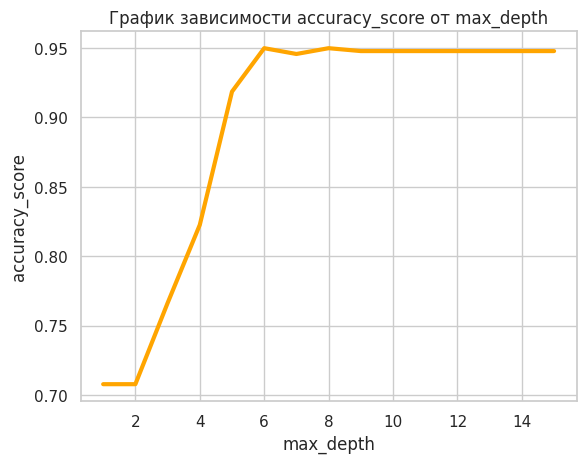

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X = dat.drop('V10', axis=1)
y = dat['V10']
y = y.astype(int)

feature_types = np.full(X.shape[1], "categorical")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

x = range(1,16)
accuracy_scores = []
for i in x:
  model = DecisionTree(feature_types, max_depth=i)
  model.fit(X_train.to_numpy(), np.array(y_train))
  y_pred = model.predict(X_test.to_numpy())
  accuracy_scores.append(accuracy_score(y_test, y_pred))
y = accuracy_scores
plt.plot(x, y, color='orange', linewidth=3)
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
plt.title('График зависимости accuracy_score от max_depth')
plt.show()

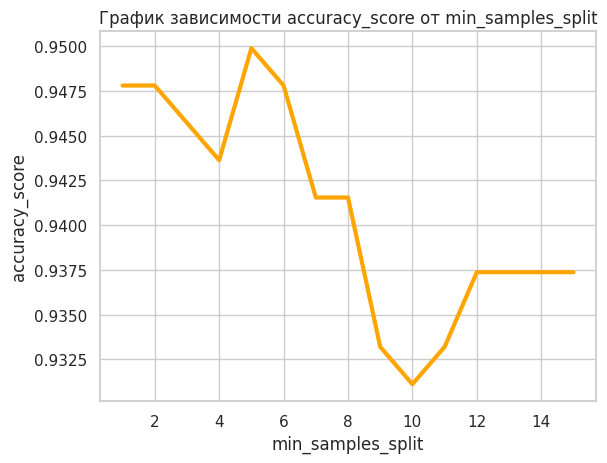

In [ ]:
accuracy_scores = []
for i in x:
  model = DecisionTree(feature_types, min_samples_split=i)
  model.fit(X_train.to_numpy(), np.array(y_train))
  y_pred = model.predict(X_test.to_numpy())
  accuracy_scores.append(accuracy_score(y_test, y_pred))
y = accuracy_scores
plt.plot(x, y, color='orange', linewidth=3)
plt.xlabel('min_samples_split')
plt.ylabel('accuracy_score')
plt.title('График зависимости accuracy_score от min_samples_split')
plt.show()

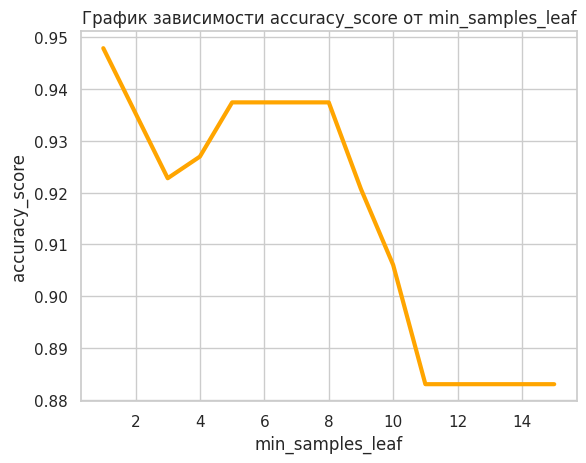

In [ ]:
accuracy_scores = []
for i in x:
  model = DecisionTree(feature_types, min_samples_leaf=i)
  model.fit(X_train.to_numpy(), np.array(y_train))
  y_pred = model.predict(X_test.to_numpy())
  accuracy_scores.append(accuracy_score(y_test, y_pred))
y = accuracy_scores
plt.plot(x, y, color='orange', linewidth=3)
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy_score')
plt.title('График зависимости accuracy_score от min_samples_leaf')
plt.show()

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [154]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
df2 = fetch_california_housing(as_frame=True)
X = df2.data
y = df2.target
df1 = pd.concat([X, y], axis=1)
X = df1.drop(columns=["MedHouseVal"])
y = df1["MedHouseVal"]
feature_types = np.full(X.shape[1], "real").tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LinearRegressionTree(feature_types)
model.fit(X_train.to_numpy(), np.array(y_train))
y_pred = model.predict(X_test.to_numpy())
print(r2_score(y_test, y_pred)) # без max_depth

0.5545734069494862


In [155]:
r2_scores = []
depths = np.arange(1, 40, 3)
for depth in depths:
  model = LinearRegressionTree(feature_types, max_depth=depth)
  model.fit(X_train.to_numpy(), np.array(y_train))
  y_pred = model.predict(X_test.to_numpy())
  r2_scores.append(r2_score(y_test, y_pred))

max_ind = np.argmax(r2_scores)
print("Max r2_score:", r2_scores[max_ind], "при max_depth =", depths[max_ind])

Max r2_score: 0.5545734069494862 при max_depth = 34


Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [152]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

# YOUR CODE


**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

😊😊😊😊😊😊😊